In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import warnings
from __future__ import division
if not sys.warnoptions:
    warnings.simplefilter("ignore")
d = pd.read_csv('creditcard.csv')

In [2]:
d.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
d['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler
d['normAmount'] = StandardScaler().fit_transform(d['Amount'].values.reshape(-1,1))
d = d.drop(['Time', 'Amount'], axis=1)
d.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [8]:
X = d.iloc[:, d.columns != 'Class']
Y = d.iloc[:, d.columns == 'Class']
Y["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
good_data = d[d.Class == 0]
good_data = good_data.sample(frac=1)
good_data = good_data.head(492)
fraud_data = d[d.Class == 1]
us = pd.concat([good_data, fraud_data]).reset_index()
us = us.sample(frac=1).reset_index()
X_us = us.iloc[:, us.columns != 'Class']
Y_us = us.iloc[:, us.columns == 'Class']

In [12]:
from sklearn.model_selection import train_test_split
X_train_us, X_test_us, Y_train_us, Y_test_us = train_test_split(X_us, Y_us, test_size=0.3, random_state=0) 

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, auc

In [30]:
print("hyperparameter tuning : ")
c_param_range = [0.01,0.1,1,10,100]
clf = GridSearchCV(LogisticRegression(), {"C": c_param_range}, cv=len(c_param_range), scoring='recall')
clf.fit(X_train_us,Y_train_us)
best_c = clf.best_params_['C']
print(best_c)

hyperparameter tuning : 
100


Recall metric in the testing dataset:  1.0


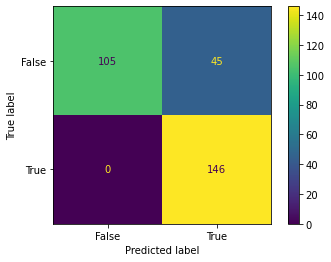

In [31]:
model = LogisticRegression(C = best_c, penalty = 'l2')
model.fit(X_train_us, Y_train_us.values.ravel())
Y_predicted = model.predict(X_test_us.values)
cnf_matrix = confusion_matrix(Y_test_us, Y_predicted)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

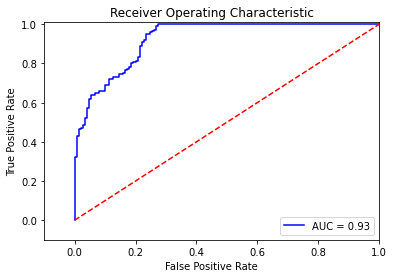

In [32]:
Y_pred_us_score = model.fit(X_train_us, Y_train_us.values.ravel()).decision_function(X_test_us.values)
fpr, tpr, thresholds = roc_curve(Y_test_us.values.ravel(),Y_pred_us_score)
roc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()